# My First Notebook

Learning Pandas, Jupyter from a sample notebook provided by Ben Welsh at LA Times. Learn the basics of data journalism at this url: https://www.firstpythonnotebook.org

Add Matplotlib (data visualization library) to notebook 

In [148]:
%matplotlib inline

Importing the CSV file above using the read_csv function included with pandas.

In [151]:
contribs = pd.read_csv("https://first-python-notebook.readthedocs.io/_static/contributions.csv")

A quick look at what the dataframe contribs consists of.. 

In [152]:
contribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56379 entries, 0 to 56378
Data columns (total 13 columns):
calaccess_committee_id          56379 non-null int64
committee_name                  56379 non-null object
calaccess_filing_id             56379 non-null int64
date_received                   56379 non-null object
contributor_lastname            56375 non-null object
contributor_firstname           53411 non-null object
contributor_city                56369 non-null object
contributor_state               56363 non-null object
contributor_zip                 56366 non-null object
contributor_employer            48572 non-null object
contributor_occupation          53273 non-null object
contributor_is_self_employed    56379 non-null bool
amount                          56379 non-null float64
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 5.2+ MB


Adding the committees CSV file using the pandas library. 

In [153]:
props=pd.read_csv("https://first-python-notebook.readthedocs.io/_static/committees.csv")

A quick look at its structure. 

In [155]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
ocd_prop_id               102 non-null object
calaccess_prop_id         102 non-null int64
ccdc_prop_id              102 non-null int64
prop_name                 102 non-null object
ccdc_committee_id         102 non-null int64
calaccess_committee_id    102 non-null int64
committee_name            102 non-null object
committee_position        102 non-null object
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


Importing the pandas library. 

In [ ]:
import pandas as pd

Let's create a list so we can show how to use it in Pandas.

In [ ]:
my_list = [7,4,8,10,4,6]

Converting a plain Python list into what pandas calls a Series. 

In [157]:
my_series = pd.Series(my_list)

You can use .median, .mean, .mode, min, max, and a bunch of other Pandas tools on the series. 

In [159]:
my_series.median()

5.0

Value_counts is a built-in Pandas tool that will total up the frequency of values in a column. reset_index is chained because it delivers a clean-looking table. 

In [162]:
props.prop_name.value_counts().reset_index()

,index,prop_name
0,PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE...,13
1,PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTH...,12
2,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,11
3,PROPOSITION 066- DEATH PENALTY. PROCEDURES. IN...,9
4,PROPOSITION 055 - TAX EXTENSION TO FUND EDUCAT...,8
5,PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON...,7
6,PROPOSITION 062- DEATH PENALTY. INITIATIVE STA...,7
7,"PROPOSITION 059- SB 254 (CHAPTER 20, STATUTES ...",6
8,PROPOSITION 053 - REVENUE BONDS. STATEWIDE VOT...,4
9,PROPOSITION 054 - LEGISLATURE. LEGISLATION AND...,4


Let's spit out the full name of all 17 measures so we can filter down to what we want to investigate.

In [163]:
props.prop_name.value_counts()

PROPOSITION 057 - CRIMINAL SENTENCES. JUVENILE CRIMINAL PROCEEDINGS AND SENTENCING. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.                           13
PROPOSITION 056 - CIGARETTE TAX TO FUND HEALTHCARE, TOBACCO USE PREVENTION, RESEARCH, AND LAW ENFORCEMENT. INITIATIVE CONSTITUTIONAL AMENDMENT AND STATUTE.    12
PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.                                                                                                   11
PROPOSITION 066- DEATH PENALTY. PROCEDURES. INITIATIVE STATUTE.                                                                                                 9
PROPOSITION 055 - TAX EXTENSION TO FUND EDUCATION AND HEALTHCARE. INITIATIVE CONSTITUTIONAL AMENDMENT.                                                          8
PROPOSITION 067- REFERENDUM TO OVERTURN BAN ON SINGLE-USE PLASTIC BAGS.                                                                                         7
PROPOSITION 062- DEATH PENAL

Let's look at how Proposition 064 (Marijuana legislation) went down in California.. 

In [164]:
props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
72     False
73     False
74      True
75      True
76      True
77      True
78      True
79      True
80      True
81      True
82      True
83      True
84      True
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
Name: prop_name, Length: 102, dtype: bool

We can filter results to this, by placing the above statement in square brackets. 

In [165]:
prop=props[props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.']

A quick look at what this DataFrame looks like. 

In [166]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 74 to 84
Data columns (total 8 columns):
ocd_prop_id               11 non-null object
calaccess_prop_id         11 non-null int64
ccdc_prop_id              11 non-null int64
prop_name                 11 non-null object
ccdc_committee_id         11 non-null int64
calaccess_committee_id    11 non-null int64
committee_name            11 non-null object
committee_position        11 non-null object
dtypes: int64(4), object(4)
memory usage: 792.0+ bytes


Let's join the two files using the pandas merge method using the one field common to both the files - calaccess_committee_id

In [167]:
merged = pd.merge(prop, contribs, on="calaccess_committee_id")

In [ ]:
A quick look at what this DataFrame consists of.. .head and .info are the first things you can use to explore them.. 

In [170]:
merged.head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
0,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-02-04,BRADEN QUIGLEY,LAURA,SACRAMENTO,CA,95825,LBQ STRATEGIES,CONSULTANT,False,100.0
1,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
2,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-29,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
3,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-03-28,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",NaN,IRVINE,CA,92618,NaN,NaN,False,250000.0
4,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2038581,2016-01-05,DRUG POLICY ACTION,NaN,NEW YORK,NY,10001,NaN,NaN,False,250000.0


What's the top contribution? 

In [171]:
merged.amount.max()

4000000.0

A look at how financial contributions for this proposition played out.. 

In [172]:
merged.committee_position.value_counts()

SUPPORT    762
OPPOSE      98
Name: committee_position, dtype: int64

Let's filter our merged table down using that column and the pandas filtering method that combines a column, an operator and the value we want to filter by

In [173]:
support = merged[merged.committee_position == 'SUPPORT']

In [174]:
oppose = merged[merged.committee_position == 'OPPOSE']

Let's sum up the total disclosed contributions

In [176]:
oppose.amount.sum()

2501211.64

In [177]:
support.amount.sum()

32675806.0

Let's calculate what percent is support of the overall disclosed total

In [178]:
support.amount.sum() / merged.amount.sum()

0.9288964270479867

What were the top contributions? We can find the answer by using the sort_values method to rearrange our list using the amount field.

In [179]:
merged.sort_values("amount")

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
260,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,458,1376077,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",SUPPORT,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",2082735,2016-08-04,"GHOST MANAGEMENT GROUP, LLC DBA WEEDMAPS",NaN,IRVINE,CA,92618,NaN,NaN,False,-150000.0
793,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,461,1343793,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",SUPPORT,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",2130986,2016-11-02,ROBINETT,PETER,SAN FRANCISCO,CA,94114,"APPLE, INC.",PROGRAMMER,False,-900.0
806,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,461,1343793,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",SUPPORT,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",2130986,2016-10-26,MEDLOCK,MARSTON,ALHAMBRA,CA,91801,NaN,RETIRED,False,-100.0
727,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,461,1343793,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",SUPPORT,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",2083494,2016-07-13,WOOD,DAVID,CALGARY,AB,T2P0R3,BORDEN LADNER GERVAIS,ATTORNEY,False,-100.0
698,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,461,1343793,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",SUPPORT,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",2083494,2016-07-27,SAMIMI-ARDESTAN,AMIRGHASEM,NORTH VANCOUVER,BC,V7J1V2,MEDIGREEN,CHIEF EXECUTIVE OFFICER,False,-100.0
227,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2130956,2016-12-04,BROOKES,ETHAN,PLEASANT HILL,CA,94523,LONZA BIOSCIENCE,SALES CONSULTANT,False,-50.0
812,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,462,1386560,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,SUPPORT,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,2083796,2016-08-10,WARREN-SAMARIPA,STEPHANIE,SAN DIEGO,CA,92116,STEPHANIE WARREN SAMARIPA,ENTREPRENEUR,False,-50.0
127,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-06,MITCHELL,BRIAN,REDONDO BEACH,CA,90278,DIRECTV,MANAGER,False,10.0
118,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-09,MALMO,JOHN,FRESNO,CA,93737,NETZER & MALMO,ATTORNEY,False,10.0
220,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2098281,2016-10-14,VOEGTLI,JERRY,SIMI VALLEY,CA,93065,NONE,UNEMPLOYED,False,10.0


That list wasn't very helpful, let's sort by ascending. 

In [180]:
merged.sort_values("amount", ascending=False).head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
142,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,4000000.0
79,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,2000000.0
846,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",2083608,2016-09-15,FUND FOR POLICY REFORM (NONPROFIT 501 (C)(4)),NaN,NEW YORK,NY,10019,NaN,NaN,False,1970000.0
851,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
852,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0


Let's get a top 10 list of supporters and opposers.  

In [182]:
support.sort_values("amount", ascending=False).head(10)

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
142,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,4000000.0
79,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-15,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",NaN,SACRAMENTO,CA,95815,NaN,NaN,False,2000000.0
851,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-09-15,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1970000.0
846,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",2083608,2016-09-15,FUND FOR POLICY REFORM (NONPROFIT 501 (C)(4)),NaN,NEW YORK,NY,10019,NaN,NaN,False,1970000.0
852,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2096507,2016-09-27,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1403000.0
141,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-07-01,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,1250000.0
850,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,465,1385745,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),SUPPORT,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),2082414,2016-07-07,FUND FOR POLICY REFORM,NaN,WILMINGTON,DE,19809,NaN,NaN,False,1000000.0
143,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,456,1381808,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",SUPPORT,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",2083528,2016-09-16,PARKER AND AFFILIATED ENTITIES,SEAN,PALO ALTO,CA,94301,NaN,NaN,False,1000000.0
845,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,464,1385506,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",SUPPORT,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",2083608,2016-07-07,FUND FOR POLICY REFORM (NONPROFIT 501 (C)(4)),NaN,NEW YORK,NY,10019,NaN,NaN,False,1000000.0
254,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,457,1382525,NEW APPROACH PAC (MPO),SUPPORT,NEW APPROACH PAC (MPO),2083758,2016-07-27,PARKER,SEAN,PALO ALTO,CA,94301,SEAN PARKER FOUNDATION,CHAIRMAN,False,1000000.0


In [183]:
oppose.sort_values("amount", ascending=False).head()

,ocd_prop_id,calaccess_prop_id,ccdc_prop_id,prop_name,ccdc_committee_id,calaccess_committee_id,committee_name_x,committee_position,committee_name_y,calaccess_filing_id,date_received,contributor_lastname,contributor_firstname,contributor_city,contributor_state,contributor_zip,contributor_employer,contributor_occupation,contributor_is_self_employed,amount
839,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2083142,2016-07-20,SCHAUER,JULIE,OAKS,PA,19456,NaN,RETIRED,False,1000000.0
312,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2098048,2016-09-27,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,400000.0
310,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-15,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,225000.0
308,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,459,1382568,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",OPPOSE,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",2083071,2016-09-12,"SAM ACTION, INC.",NaN,ALEXANDRIA,VA,22314,NaN,NaN,False,200000.0
840,ocd-contest/232cb72c-1b11-4293-b4e2-a181e80d172e,1381868,83,PROPOSITION 064- MARIJUANA LEGALIZATION. INITI...,463,1387789,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",OPPOSE,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",2083142,2016-07-25,SCHAUER,JULIE,OAKS,CA,19456,NaN,RETIRED,False,150000.0


Groupby is a pandas method that allows you to group a DataFrame by a column and then calculate a sum, or any other statistic, for each unique value. We user the reset_index method to make this data pretty, and sort_values to group the top contributing committees.

In [185]:
merged.groupby("committee_name_x").amount.sum().reset_index().sort_values("amount", ascending=False)

,committee_name_x,amount
10,"YES ON 64, CALIFORNIANS TO CONTROL, REGULATE A...",15734047.00
4,FUND FOR POLICY REFORM (NONPROFIT 501(C)(4)),6140000.00
3,"DRUG POLICY ACTION - NON PROFIT 501C4, YES ON ...",4470000.00
7,NEW APPROACH PAC (MPO),3865000.00
9,"SAM ACTION, INC., A COMMITTEE AGAINST PROPOSIT...",1364000.00
8,"PUBLIC AND MENTAL HEALTH ADVOCATES AGAINST 64,...",1130930.00
1,"CALIFORNIANS FOR RESPONSIBLE MARIJUANA REFORM,...",860470.00
2,"CALIFORNIANS FOR SENSIBLE REFORM, SPONSORED BY...",850000.00
5,"MARIJUANA POLICY PROJECT OF CALIFORNIA, YES ON 64",739200.00
0,ADULT USE CAMPAIGN FOR PROPOSITION 64; THE,17089.00


Top contributors to Prop 64.. 

In [186]:
merged.groupby(["contributor_firstname", "contributor_lastname", "committee_position"]).amount.sum().reset_index().sort_values("amount", ascending=False)

,contributor_firstname,contributor_lastname,committee_position,amount
483,SEAN,PARKER AND AFFILIATED ENTITIES,SUPPORT,7250000.0
482,SEAN,PARKER,SUPPORT,1500000.0
281,JULIE,SCHAUER,OPPOSE,1364000.0
108,DANIEL,LEWIS,SUPPORT,1250000.0
194,HENRY,VAN AMERINGEN,SUPPORT,1000000.0
405,NICHOLAS,PRITZKER,SUPPORT,900000.0
421,PETER,THIEL,SUPPORT,300000.0
456,ROGER,JENKINS,SUPPORT,75000.0
23,ANGELA,HOWARD,SUPPORT,65000.0
322,LAWRENCE,HESS,SUPPORT,30000.0


Let's filter the top supporters. 

In [187]:
top_supporters = support.groupby(
    ["contributor_firstname", "contributor_lastname"]
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

In [188]:
top_supporters.head(10)

,contributor_firstname,contributor_lastname,amount
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
443,SEAN,PARKER,1500000.0
102,DANIEL,LEWIS,1250000.0
180,HENRY,VAN AMERINGEN,1000000.0
374,NICHOLAS,PRITZKER,900000.0
390,PETER,THIEL,300000.0
421,ROGER,JENKINS,75000.0
22,ANGELA,HOWARD,65000.0
297,LAWRENCE,HESS,30000.0
425,ROGER B.,MCNAMEE,10000.0


Making a chart by stringing the plot method onto the end of the DataFrame. We add labels using set_yticklabels in matplotlib.

[Text(0,0,'PARKER AND AFFILIATED ENTITIES'),
 Text(0,0,'PARKER'),
 Text(0,0,'LEWIS'),
 Text(0,0,'VAN AMERINGEN'),
 Text(0,0,'PRITZKER')]

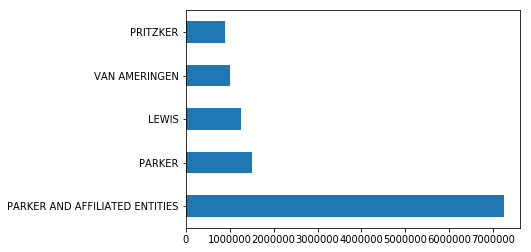

In [189]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_lastname)

Not clear since it's only using the last name. Let's create a proper label with first name and last name. 

In [192]:
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

[Text(0,0,'SEAN PARKER AND AFFILIATED ENTITIES'),
 Text(0,0,'SEAN PARKER'),
 Text(0,0,'DANIEL LEWIS'),
 Text(0,0,'HENRY VAN AMERINGEN'),
 Text(0,0,'NICHOLAS PRITZKER')]

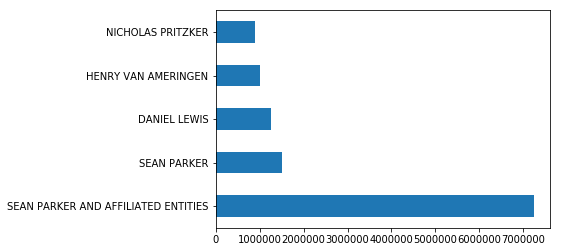

In [196]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)

In [ ]:
Export this data into a spreadsheet.

In [194]:
top_supporters.head(5).to_csv("top_supporters.csv")

Sean Parker's name appears twice.. Let's clean up this data with a Python function. If that row’s name field starts with the phrase SEAN PARKER we’re going to return a common clean name that all Sean Parker rows can share.

In [198]:
def combine_names(row):
    if row.contributor_fullname.startswith('SEAN PARKER'):
        return 'SEAN PARKER'
    return row.contributor_fullname

Now that we have our function, we’ll want to run it across our DataFrame and store the result for each row in a new column. In pandas this can be done for a DataFrame with the apply method. To run the method row by row, pandas requires you pass the number 1 into the axis option.

In [199]:
top_supporters.apply(combine_names, axis=1)

444            SEAN PARKER
443            SEAN PARKER
102           DANIEL LEWIS
180    HENRY VAN AMERINGEN
374      NICHOLAS PRITZKER
390            PETER THIEL
421          ROGER JENKINS
22           ANGELA HOWARD
297          LAWRENCE HESS
425       ROGER B. MCNAMEE
dtype: object

That will spit out a Series with the returned value for each row. Notice that the two Sean Parker rows are now identical.

That Series can now be saved into a new column on the DataFrame by assigning it with a new name.



In [200]:
top_supporters['contributor_cleanname'] = top_supporters.apply(combine_names, axis=1)

Let's regroup the data using this new column and total the columns again, exactly as we did before.

In [201]:
top_supporters.groupby(
    "contributor_cleanname"
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)

,contributor_cleanname,amount
8,SEAN PARKER,8750000.0
1,DANIEL LEWIS,1250000.0
2,HENRY VAN AMERINGEN,1000000.0
4,NICHOLAS PRITZKER,900000.0
5,PETER THIEL,300000.0
7,ROGER JENKINS,75000.0
0,ANGELA HOWARD,65000.0
3,LAWRENCE HESS,30000.0
6,ROGER B. MCNAMEE,10000.0
